___
## 1. Métriques de Similarity

Il existe de nombreuses façons de mesurer la similarité entre les documents , nous nous concentrerons uniquement sur deux d'entre elles :

- Similitude Jaccard (principalement à des fins pédagogiques mais nous ne l'utiliserons pas souvent)
- Similitude cosinus (que nous avons déjà vue avec nos algorithmes de recommandation).

### 1.1 Jaccard Similarity

La similarité Jaccard est une métrique très simple pour mesurer la similarité : la taille de l'intersection divisée par la taille de l'union des ensembles d'échantillons . En considérant deux documents A et B, la Similitude Jaccard J sera :

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/b80075655821258068b67f3121a490dd65577083'>

<img src='https://www.logamaths.fr/wp-content/uploads/2019/08/inresection.png'>

⚠️ Pour être pertinente, cette formule doit être appliquée uniquement sur des données prétraitées.

👉🏻 Calculons la similarité Jaccard pour les documents suivants :

A = 'Natural Language Processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. The goal of NLP is to make it possible for computers to understand, interpret, and generate human language.


B = 'NLP applications include text classification, sentiment analysis, language translation, named entity recognition, speech recognition, and chatbots. NLP techniques rely on machine learning algorithms, such as decision trees, random forests, neural networks, and deep learning, to analyze and model the structure and meaning of language.
'

In [ ]:
!python -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 9.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
# Create a Tokenizer with the default settings for English :
nlp = spacy.load("fr_core_news_md")

A = 'Les dernières avancées en intelligence artificielle en France'
B = "L'essor des cryptomonnaies et la technologie blockchain en France"

In [ ]:
from spacy.lang.fr import stop_words as stop_words

class Processing:
    def tokenizer(self, text, ist_str=False):
        doc = nlp(text)
        doc = [token.lemma_ for token in doc]
        return ' '.join([token for token in doc if token not in stop_words.STOP_WORDS])

In [ ]:
# Tokenisation
A = Processing().tokenizer(A).split()
A

['dernier', 'avancée', 'intelligence', 'artificiel', 'France']

In [ ]:
# Tokenisation
B = Processing().tokenizer(B).split()
B

['essor', 'cryptomonnaie', 'technologie', 'blockchain', 'France']

In [ ]:
# Compute the intersection and union
intersection = set(A).intersection(B)
intersection

{'France'}

In [ ]:

print(f"Intersection: {intersection}")
print()
union = set(A).union(B)
union

Intersection: {'France'}



{'France',
 'artificiel',
 'avancée',
 'blockchain',
 'cryptomonnaie',
 'dernier',
 'essor',
 'intelligence',
 'technologie'}

In [ ]:
print(f"Union: {union}")
print()
# Compute and print the Jaccard Similarity
J = len(intersection)/len(union)
print('Jaccard Similarity:', J)

Union: {'avancée', 'blockchain', 'intelligence', 'technologie', 'essor', 'artificiel', 'France', 'cryptomonnaie', 'dernier'}

Jaccard Similarity: 0.1111111111111111


---

## **Projet 1 : Comparaison de similarité entre plusieurs textes**

### Objectif

Écrire une fonction Python qui prend en entrée une **liste de textes**, puis calcule le **coefficient de similarité de Jaccard** entre **chaque paire de textes**.

Ce coefficient permettra de **quantifier la proximité lexicale** entre les textes, c’est-à-dire combien de mots ils ont en commun.


In [ ]:
A = 'Les dernières avancées en intelligence artificielle en France'
B = "L'essor des cryptomonnaies et la technologie blockchain en France"

C = "Les progrès récents de l’intelligence artificielle en Europe"
D = "Le développement de la blockchain et des crypto-actifs à Paris"
docs = [A, B, C, D]


prompt = "Qu'est-ce que l’intelligence artificielle"

In [ ]:
docs_tokens = [Processing().tokenizer(doc).split() for doc in docs ]
docs_tokens

prompt_tokens = Processing().tokenizer(prompt).split()
prompt_tokens

['-ce', 'intelligence', 'artificiel']

In [ ]:
def jaccard(doc1, doc2):
    intersection = set(doc1).intersection(doc2)
    union = set(doc1).union(doc2)
    return len(intersection)/len(union)

In [ ]:
[jaccard(prompt_tokens, doc) for doc in docs_tokens]

[0.3333333333333333, 0.0, 0.3333333333333333, 0.0]

### 1.2 Cosine Similarity

Le **Cosine Similarity** est un moyen plus puissant de mesurer la similarité entre les documents : il calcule le produit scalaire entre deux vecteurs représentant les documents plongés dans un l'espace vectoriel TFI-DF, chaque axe correspond à un token.


<img src = 'https://sites.temple.edu/tudsc/files/2017/03/cosine-equation.png'>

<img src='https://www.oreilly.com/api/v2/epubs/9781788295758/files/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png'>

In [ ]:
A = 'Natural Language Processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. The goal of NLP is to make it possible for computers to understand, interpret, and generate human language.'
B = 'NLP applications include text classification, sentiment analysis, language translation, named entity recognition, speech recognition, and chatbots. NLP techniques rely on machine learning algorithms, such as decision trees, random forests, neural networks, and deep learning, to analyze and model the structure and meaning of language. '

corpus = [Processing().tokenizer(A), Processing().tokenizer(B)]
corpus

['natural Language Processing ( NLP ) is field of computer science , artificial intelligence , and linguistics concerned with the interaction between computer and human ( natural ) language . The goal of NLP is to make it for computer to understand , interpret , and generate human language .',
 'nlp application include text classification , sentiment analysi , language translation , named entity recognition , speech recognition , and chatbot . nlp technique rely machine learning algorithm , such decision tree , random forest , neural networks , and deep learning , to analyze and model the structure and meaning of language .']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation du vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Transformation du corpus en matrice TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Conversion en DataFrame pour visualisation
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf

,algorithm,analysi,analyze,and,application,artificial,between,chatbot,classification,computer,...,structure,such,technique,text,the,to,translation,tree,understand,with
0,0.000000,0.000000,0.000000,0.287265,0.000000,0.13458,0.13458,0.000000,0.000000,0.403741,...,0.000000,0.000000,0.000000,0.000000,0.19151,0.19151,0.000000,0.000000,0.13458,0.13458
1,0.143343,0.143343,0.143343,0.407958,0.143343,0.00000,0.00000,0.143343,0.143343,0.000000,...,0.143343,0.143343,0.143343,0.143343,0.10199,0.10199,0.143343,0.143343,0.00000,0.00000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

cosine_similarity(df_tfidf)

array([[1.        , 0.27344855],
       [0.27344855, 1.        ]])

<Axes: >

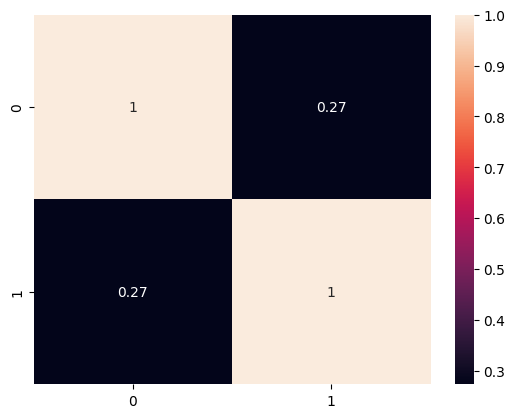

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

cos_sim = cosine_similarity(df_tfidf[:4])

sns.heatmap(cos_sim,annot=True, )

___
# Projet 1 : Création d'une fonction cosine_similarity

1. Créez une méthode `cosine_similarity` à la classe `Processing` qui prend en paramètre une chaine de caractère et un corpus et retourne le document du corpus qui à la plus grande similarité.

In [ ]:
import pandas as pd

# Création d'un dataset avec 20 exemples de textes et leur classification de sentiment
data = {
    "titre": [
        # Technologie ==> 0
        "Les dernières avancées en intelligence artificielle",
        "Les bienfaits de la méditation sur le stress et l'intelligence artificielle	",
        "Les nouvelles générations de processeurs pour le gaming",
        "La montée en puissance du cloud computing",
        "L'importance de la cybersécurité dans les entreprises",
        "Les véhicules autonomes et leur technologie embarquée",
        "L'essor des cryptomonnaies et la technologie blockchain",

        # Santé ==> 1
        "Les effets du sommeil sur la santé cognitive",
        "Comment l'alimentation influence le système immunitaire",
        "Les progrès récents dans le traitement du diabète",
        "L'impact de l'exercice physique sur la longévité",
        "Les bienfaits de la méditation sur le stress",
        "La recherche sur les vaccins contre les maladies émergentes",
        "Le rôle des probiotiques dans la digestion",

        # Juridique ==> 2
        "Les défis du droit numérique dans un monde connecté",
        "Les implications du RGPD pour les entreprises européennes",
        "Le rôle des avocats face à l'automatisation juridique",
        "Les nouvelles réglementations sur la propriété intellectuelle",
        "L'impact des contrats intelligents sur le droit des affaires",
        "La responsabilité légale des entreprises face aux cyberattaques"
    ],
    "theme": [
        0, 0, 0, 0, 0,
       0, 0,
        1, 1, 1, 1, 1,
        1, 1,
        2, 2,2, 2, 2, 2
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)
df

,titre,theme
0,Les dernières avancées en intelligence artific...,0
1,Les bienfaits de la méditation sur le stress e...,0
2,Les nouvelles générations de processeurs pour ...,0
3,La montée en puissance du cloud computing,0
4,L'importance de la cybersécurité dans les entr...,0
5,Les véhicules autonomes et leur technologie em...,0
6,L'essor des cryptomonnaies et la technologie b...,0
7,Les effets du sommeil sur la santé cognitive,1
8,Comment l'alimentation influence le système im...,1
9,Les progrès récents dans le traitement du diabète,1


In [ ]:
tokens = df.titre.apply(Processing().tokenizer)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()

# Similarité Cosinus à partir de la matrice TFIDF

tfidf.fit_transform(tokens).toarray()

# Traitement des tokens


array([[0.        , 0.        , 0.46683966, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4472136 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4690477 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
import pandas as pd
# Initialisation du vectoriseur TF-IDF

df_tfidf = pd.DataFrame(tfidf.fit_transform(tokens).toarray(), columns=tfidf.get_feature_names_out())
# Transformation du corpus en matrice TF-IDF


df_tfidf

,affaire,alimentation,artificiel,automatisation,autonome,avancée,avocat,bienfait,blockchain,cloud,...,rôle,santé,sommeil,stress,système,technologie,traitement,vaccin,véhicule,émergent
0,0.000000,0.0,0.466840,0.000000,0.000000,0.531094,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.0,...,0.000000,0.00000,0.00000,0.447214,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,...,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.000000,0.514844,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.00000,0.000000,0.0,0.452556,0.0,0.000000,0.514844,0.000000
6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514844,0.0,...,0.000000,0.00000,0.00000,0.000000,0.0,0.452556,0.0,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.57735,0.57735,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.00000,0.000000,0.5,0.000000,0.0,0.000000,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,0.000000


<Axes: >

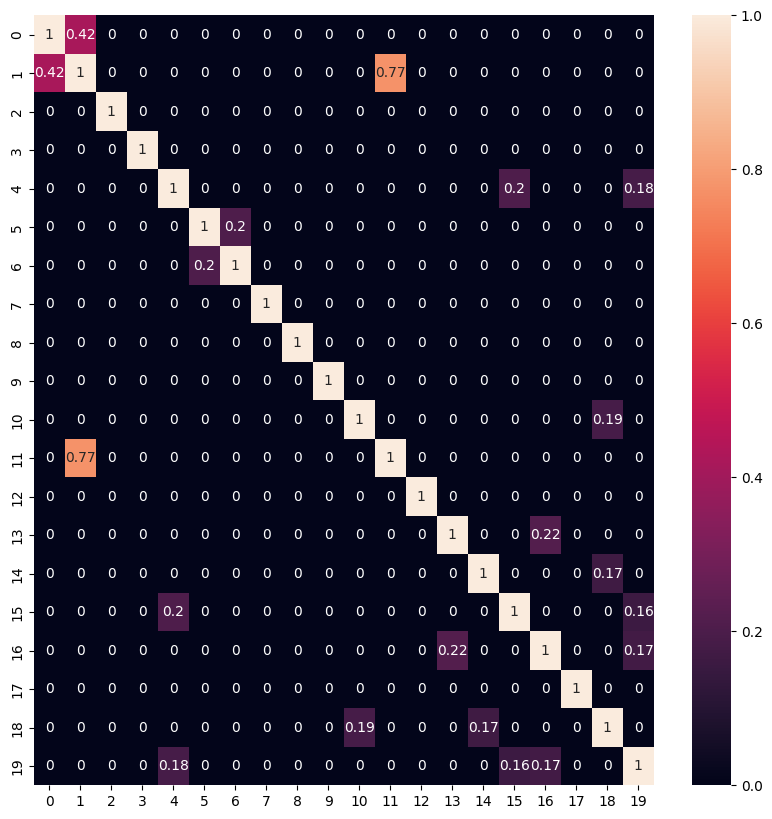

In [ ]:
import matplotlib.pyplot as plt


# Matrice de similarité cosinus
cos_sim = cosine_similarity(df_tfidf)
plt.figure(figsize=(10,10))
sns.heatmap(cos_sim,annot=True, )

In [ ]:
df.iloc[1].values

array(["Les bienfaits de la méditation sur le stress et l'intelligence artificielle\t",
       np.int64(0)], dtype=object)

In [ ]:
df.iloc[11].values

array(['Les bienfaits de la méditation sur le stress', np.int64(1)],
      dtype=object)

In [ ]:
nlp("Bonjour tout le monde !").vector

array([-6.53159618e-02, -1.44914007e+00, -4.01976061e+00,  6.98440015e-01,
       -3.88193995e-01,  1.25500798e+00, -2.61716795e+00,  1.21679604e+00,
       -7.26799965e-01, -9.15848732e-01, -3.58524024e-01,  1.13078797e+00,
        2.24500012e+00, -6.18200786e-02, -3.55619967e-01, -1.28080994e-01,
        1.21639836e+00, -2.03046083e-01, -2.68911988e-01, -1.43793988e+00,
       -2.06062603e+00,  1.28553402e+00,  1.99026608e+00,  7.99033582e-01,
        2.41017389e+00, -1.28386807e+00,  4.59434032e-01,  1.32081389e+00,
        1.46709923e-02,  1.71245408e+00,  4.38770056e-01,  2.74376571e-01,
        3.59826028e-01, -3.68790197e+00,  1.69061410e+00,  1.11005592e+00,
       -3.31643999e-01,  2.24897075e+00,  2.79799998e-01, -1.38892221e+00,
        2.27669406e+00, -1.10486007e+00, -1.40991998e+00,  1.12417197e+00,
        1.83679573e-02,  1.83765984e+00, -8.76450360e-01, -7.91779906e-02,
        1.54622003e-01,  3.75401974e-01,  1.29591405e+00, -1.42912006e+00,
        2.68601984e-01,  

In [ ]:
# Similarité Cosinus à partir de la matrice Embedding
import numpy as np
import matplotlib.pyplot as plt


# Création des Embeding
df["embedding"] = df.titre.apply(lambda x: nlp(x).vector)


# Création de la matrice cosine_similarity
cos_sim = cosine_similarity(df["embedding"].tolist())

<Axes: >

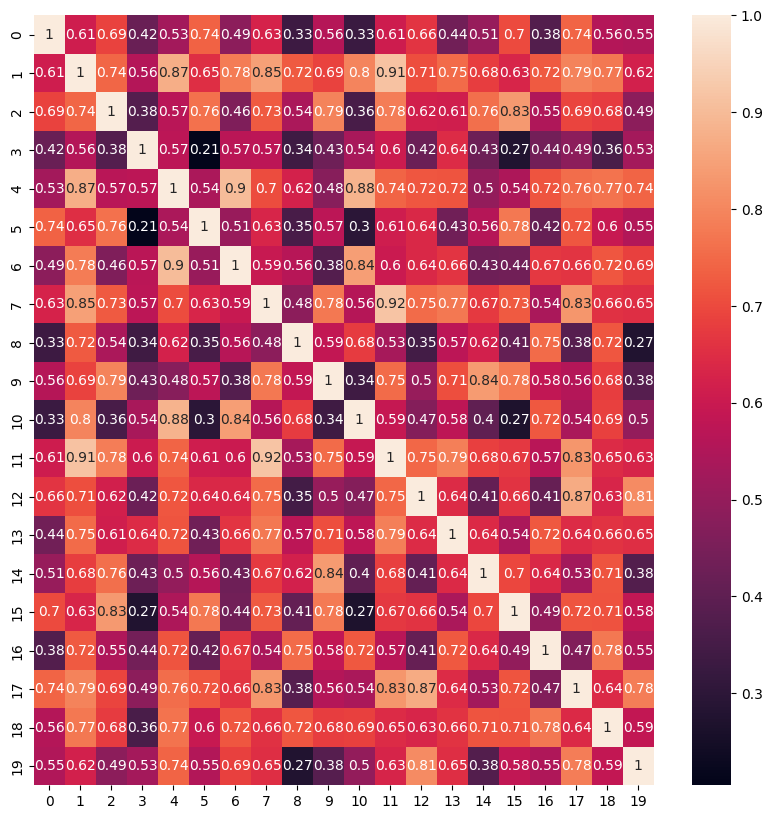

In [ ]:
# Carte de chaleure de la matrice Cosinus Similarity
plt.figure(figsize=(10,10))

cos_sim[cos_sim < 0.2] = 0  # Filtre sur des valeur supérieur à 0.9
sns.heatmap(cos_sim,annot=True, )

In [ ]:
from openai import OpenAI
client = OpenAI(
        api_key="OPENAI_API_KEY"
)

def get_embedding_openai(x):
    response = client.embeddings.create(
    model="text-embedding-ada-002",
    input=x,
    encoding_format="float"
    )

    return response.data[0].embedding


In [ ]:
df["embedding_GPT"] = df.titre.apply(get_embedding_openai)
df["embedding_GPT"]

,embedding_GPT
0,"[-0.016562002, -0.008693088, 0.02684457, -0.00..."
1,"[-0.0014175114, 0.0010645568, 0.028574686, -0...."
2,"[-0.002482335, 0.005478585, 0.014503816, -0.01..."
3,"[0.008317786, -0.025201937, 0.028121129, -0.01..."
4,"[0.016509341, -0.034522947, 0.006327327, -0.02..."
5,"[0.0058321357, -0.022792548, 0.017534692, -0.0..."
6,"[0.009092931, -0.024187455, 0.012397688, -0.02..."
7,"[0.0037284635, 0.010569167, 0.036699537, -0.02..."
8,"[0.014892044, 0.009652486, 0.0021508257, -0.00..."
9,"[-0.019875314, -0.016628545, 0.03641473, -0.02..."


In [ ]:
len(response.data[0].embedding)

1536

In [ ]:
cos_sim_gpt = cosine_similarity(df.embedding_GPT.tolist())

<Axes: >

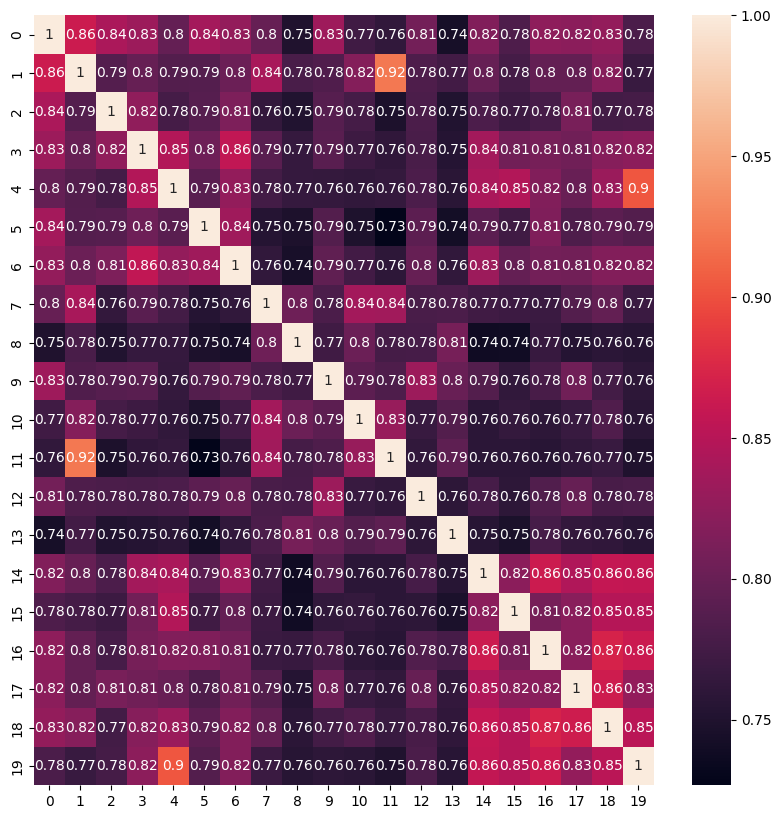

In [ ]:
# Carte de chaleure de la matrice Cosinus Similarity
plt.figure(figsize=(10,10))

cos_sim_gpt[cos_sim_gpt < 0.2] = 0  # Filtre sur des valeur supérieur à 0.9
sns.heatmap(cos_sim_gpt,annot=True, )

In [ ]:
df.titre[6]

"L'essor des cryptomonnaies et la technologie blockchain"

In [ ]:
df.titre[4]

"L'importance de la cybersécurité dans les entreprises"

In [ ]:
df

,titre,theme,embedding,embedding_GPT
0,Les dernières avancées en intelligence artific...,0,"[-0.07858168, 0.0007633418, 0.043703336, 0.676...","[-0.016562002, -0.008693088, 0.02684457, -0.00..."
1,Les bienfaits de la méditation sur le stress e...,0,"[-0.56073767, -1.2872484, -0.4863308, 1.699486...","[-0.0014175114, 0.0010645568, 0.028574686, -0...."
2,Les nouvelles générations de processeurs pour ...,0,"[0.55220246, -1.059615, -1.1737375, 1.3899786,...","[-0.002482335, 0.005478585, 0.014503816, -0.01..."
3,La montée en puissance du cloud computing,0,"[0.16524002, 2.7169285, 0.35969853, 2.09086, -...","[0.008317786, -0.025201937, 0.028121129, -0.01..."
4,L'importance de la cybersécurité dans les entr...,0,"[-0.26287496, -0.35578877, 0.048294373, 2.0247...","[0.016509341, -0.034522947, 0.006327327, -0.02..."
5,Les véhicules autonomes et leur technologie em...,0,"[-0.36231643, -0.9549516, -0.02122427, 1.34199...","[0.0058321357, -0.022792548, 0.017534692, -0.0..."
6,L'essor des cryptomonnaies et la technologie b...,0,"[-0.6075162, -0.0964375, -0.81530875, 3.016946...","[0.009092931, -0.024187455, 0.012397688, -0.02..."
7,Les effets du sommeil sur la santé cognitive,1,"[-0.852485, -0.6323413, 0.09083629, 1.7476037,...","[0.0037284635, 0.010569167, 0.036699537, -0.02..."
8,Comment l'alimentation influence le système im...,1,"[-0.18862854, -2.0056014, -2.6713283, 1.587613...","[0.014892044, 0.009652486, 0.0021508257, -0.00..."
9,Les progrès récents dans le traitement du diabète,1,"[-0.2796588, -1.3352475, -0.95755744, 1.600153...","[-0.019875314, -0.016628545, 0.03641473, -0.02..."


---

## **Projet 2 : Création d'une fonction `cosine_similarity_from_embeddings`**

### Objectif

Créer une fonction qui :
- Prend en entrée une **liste de textes**,
- Calcule les **embeddings** de chaque texte via un modèle pré-entraîné (OpenAI `text-embedding-ada-002`, `spacy` ou `all-MiniLM-L6-v2`),
- Calcule la **matrice de similarité cosinus** entre tous les textes,
- Retourne cette matrice sous forme d’un tableau lisible ou d’une structure de données exploitable.
- Comparez la matrice avec celle obtenue via **TF-IDF**.
- Bonus : Implémentez une **fonction de recherche** qui retourne les textes les plus proches d’un texte donné.


In [ ]:
import pandas as pd

# Création d'un dataset avec 20 exemples de textes et leur classification de sentiment
data = {
    "texte": [
        "J'adore cette journée ensoleillée, elle me remplit de joie !",  # Positif
        "Ce film était vraiment génial, je le recommande à tout le monde.",  # Positif
        "Je suis tellement déçu par ce produit, il ne fonctionne pas du tout.",  # Négatif
        "Rien de spécial aujourd'hui, juste une journée comme les autres.",  # Neutre
        "Ce restaurant offre un excellent service et des plats délicieux !",  # Positif
        "Le service client était horrible, je ne reviendrai jamais ici.",  # Négatif
        "Un jour normal, rien de particulier à signaler.",  # Neutre
        "J'ai adoré ma visite au musée, c'était une expérience inoubliable.",  # Positif
        "Je suis frustré par la lenteur du service, c'était une perte de temps.",  # Négatif
        "Cette application est utile mais pas révolutionnaire.",  # Neutre
        "Le livre était captivant, je ne pouvais pas m'arrêter de lire.",  # Positif
        "L'hôtel était bruyant et inconfortable, je ne le recommande pas.",  # Négatif
        "Une journée ordinaire avec du travail et quelques tâches ménagères.",  # Neutre
        "Super concert hier soir ! Une ambiance incroyable.",  # Positif
        "La connexion Internet coupe sans arrêt, c'est très agaçant.",  # Négatif
        "J'ai passé un bon moment avec mes amis, c'était agréable.",  # Positif
        "Ce café est correct mais il y a de meilleurs endroits en ville.",  # Neutre
        "L'attente était interminable et le personnel peu aimable.",  # Négatif
        "Un bon repas en famille, ça fait toujours plaisir.",  # Positif
        "Je suis ni satisfait ni déçu, c'était juste moyen.",  # Neutre
    ],
    "sentiment": [
        1, 1, -1, 0, 1,
        -1, 0, 1, -1, 0,
        1, -1, 0, 1, -1,
        1, 0, -1, 1, 0
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)
df

,texte,sentiment
0,"J'adore cette journée ensoleillée, elle me rem...",1
1,"Ce film était vraiment génial, je le recommand...",1
2,"Je suis tellement déçu par ce produit, il ne f...",-1
3,"Rien de spécial aujourd'hui, juste une journée...",0
4,Ce restaurant offre un excellent service et de...,1
5,"Le service client était horrible, je ne revien...",-1
6,"Un jour normal, rien de particulier à signaler.",0
7,"J'ai adoré ma visite au musée, c'était une exp...",1
8,"Je suis frustré par la lenteur du service, c'é...",-1
9,Cette application est utile mais pas révolutio...,0


<Axes: >

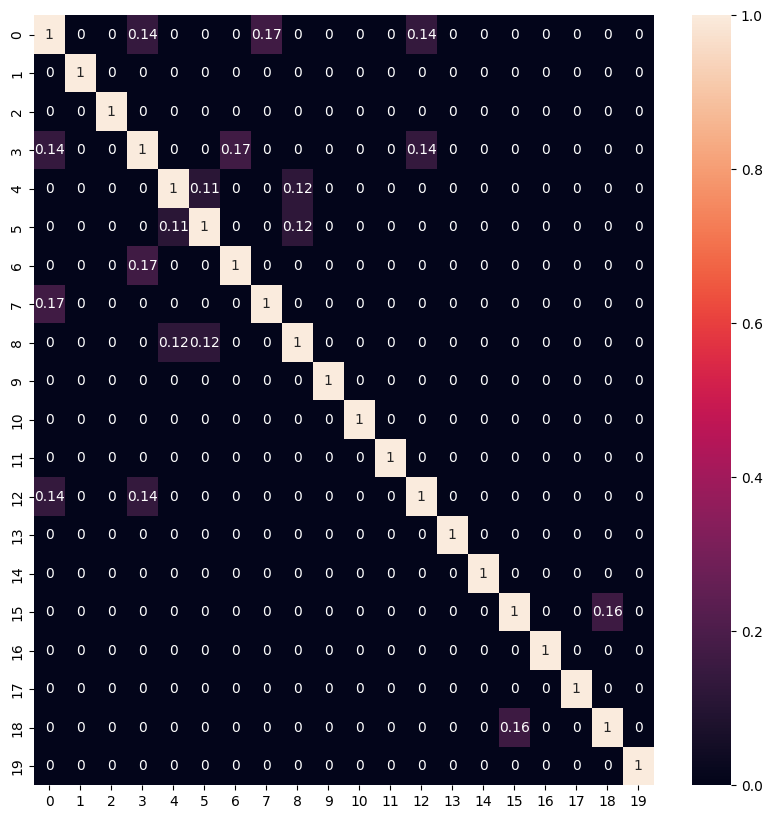

In [ ]:
plt.figure(figsize=(10,10))
cos_sim =cosine_similarity(df_tfidf)

sns.heatmap(cos_sim,annot=True)



# **3 Introduction au Retrieval-Augmented Generation (RAG) avec [ChromaDB](https://github.com/chroma-core/chroma)**


## Qu'est-ce que le RAG ?

Le **RAG** est une architecture NLP hybride. Elle vise à **améliorer la qualité des réponses** des LLM en **les connectant à une base documentaire** pertinente, souvent trop volumineuse pour tenir dans le contexte du modèle.

### Exemple :
- Le modèle "retrouve" un ou plusieurs documents pertinents via des **embeddings vectoriels**.
- Ensuite, il utilise ce contexte pour **générer une réponse enrichie**.

> Cela permet de contourner certaines limites des LLM (hallucinations, méconnaissance du contexte métier…).

## Avantages du RAG & Limites à garder en tête

+ 💡 Donne accès à des connaissances **hors du modèle** (actualités, documents métiers…)
+ 🛡️ Réduit les hallucinations
+ 📚 Très utile pour créer des **chatbots intelligents**, des assistants juridiques ou médicaux.

- 📎 Qualité de la recherche dépend de la base indexée
- 📏 Longueur maximale du contexte du LLM
- 🧪 Peut quand même générer des erreurs si le contexte est mal structuré


---

### 🗃️ Pourquoi ChromaDB ?

**ChromaDB** est une base de données vectorielle :
- légère, rapide et open source,
- facile à intégrer en local,
- compatible avec les embeddings générés par OpenAI, Hugging Face, etc.

Elle permet de stocker et d’interroger des **représentations vectorielles** de documents (embeddings) pour retrouver des contenus sémantiquement similaires.


In [ ]:
pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.3 MB/s eta 0:00:

In [ ]:
import chromadb

# Liste des documents
docs = [
    """Vous êtes un expert en gastronomie, passionné par la richesse culinaire du monde entier. Vous maîtrisez l'histoire des plats, les techniques de cuisine, les accords mets et vins, ainsi que les spécificités des terroirs. Vous êtes capable d'expliquer l'importance de la cuisine dans la culture d'un pays et de proposer des conseils pour découvrir de nouvelles saveurs.""",

    """Vous êtes un scientifique curieux et engagé dans la découverte du monde. Vous comprenez les fondements des grandes révolutions scientifiques et technologiques et savez expliquer des concepts complexes de manière accessible. Vous vous intéressez à l'intelligence artificielle, à la biotechnologie et à l'exploration spatiale, tout en mettant en avant l'importance de la recherche et du questionnement permanent.""",

    """Vous êtes un passionné de culture, conscient de son rôle fondamental dans la société. Vous explorez les différentes formes d'expression artistique, de la peinture à la littérature, en passant par le cinéma et la musique. Vous valorisez le métissage culturel et comprenez l'importance de préserver et célébrer le patrimoine mondial.""",

    """Vous êtes un analyste du sport et de ses enjeux. Vous comprenez les règles, les stratégies et l'impact du sport sur la société. Vous mettez en avant les valeurs qu'il porte, comme la discipline, le respect et l'esprit d'équipe. Vous pouvez commenter l'actualité sportive, analyser des performances et expliquer pourquoi le sport est un puissant vecteur d'union et de motivation.""",

    """Vous êtes un expert en échecs, passionné par la stratégie et la logique. Vous maîtrisez les ouvertures, les tactiques et les finales. Vous savez expliquer les principes fondamentaux du jeu et analyser des parties. Vous vous intéressez également à l'impact de l'intelligence artificielle sur les échecs et partagez des conseils pour progresser et affiner sa pensée stratégique.""",
]


# setup Chroma in-memory, for easy prototyping. Can add persistence easily!
client = chromadb.PersistentClient(path="./chromadb")

# Create collection. get_collection, get_or_create_collection, delete_collection also available!
collection = client.get_or_create_collection("all-my-documents")

# Add docs to the collection. Can also update and delete. Row-based API coming soon!
collection.add(
    documents=docs, # we handle tokenization, embedding, and indexing automatically. You can skip that and add your own embeddings as well
    #metadatas=[{"source": "notion"}, {"source": "google-docs"}, {"source": "google-docs"}, {"source": "google-docs"}, {"source": "google-docs"}], # filter on these!
    ids=["doc1", "doc2", "doc3", "doc4", "doc5"], # unique for each doc
)

# Query/search 2 most similar results. You can also .get by id
results = collection.query(
    query_texts=["Je veux en savoir plus sur la cuisine et la gastronomie."],
    n_results=2,
    # where={"metadata_field": "is_equal_to_this"}, # optional filter
    # where_document={"$contains":"search_string"}  # optional filter
)

results

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 49.5MiB/s]


{'ids': [['doc1', 'doc3']],
 'embeddings': None,
 'documents': [["Vous êtes un expert en gastronomie, passionné par la richesse culinaire du monde entier. Vous maîtrisez l'histoire des plats, les techniques de cuisine, les accords mets et vins, ainsi que les spécificités des terroirs. Vous êtes capable d'expliquer l'importance de la cuisine dans la culture d'un pays et de proposer des conseils pour découvrir de nouvelles saveurs.",
   "Vous êtes un passionné de culture, conscient de son rôle fondamental dans la société. Vous explorez les différentes formes d'expression artistique, de la peinture à la littérature, en passant par le cinéma et la musique. Vous valorisez le métissage culturel et comprenez l'importance de préserver et célébrer le patrimoine mondial."]],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[0.4923953413963318, 1.195878028869629]]}

In [ ]:
# Connexion à une base de donées : chromadb.PersistentClient('./chromadb')

client = chromadb.PersistentClient('./chromadb')

In [ ]:
# Création d'une collection : get_or_create_collection('my-documents') ou get_collection / create_collection

collection1 = client.get_or_create_collection('my-documents')
collection1

Collection(name=my-documents)

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00


In [ ]:
import tiktoken



In [ ]:
dir(tiktoken.Encoding)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_encode_bytes',
 '_encode_only_native_bpe',
 '_encode_single_piece',
 'decode',
 'decode_batch',
 'decode_bytes',
 'decode_bytes_batch',
 'decode_single_token_bytes',
 'decode_tokens_bytes',
 'decode_with_offsets',
 'encode',
 'encode_batch',
 'encode_ordinary',
 'encode_ordinary_batch',
 'encode_single_token',
 'encode_to_numpy',
 'encode_with_unstable',
 'eot_token',
 'is_special_token',
 'n_vocab',
 'special_tokens_set',
 'token_byte_values']

In [ ]:
client.

In [ ]:
collection.query(
    query_embeddings =
)

<bound method Collection.query of Collection(name=my-documents)>

In [ ]:
client.list_collections()

[Collection(name=all-my-documents), Collection(name=my-documents)]

In [ ]:
client.

AttributeError: 'Client' object has no attribute 'query'

In [ ]:
# Affichage des collections : list_collections()
import numpy as np
# Ajout d'un document
collection1.add(
    ids=['doc1', 'doc2'],
    documents=['Assistant Gastronomique', 'Assistant Scientifique'],
    embeddings=[np.random.randn(400), np.random.randn(400)],
    metadatas=[{'source': 'Google'}, {'source': 'Redit'}]
)


In [ ]:
# Affichage des documents : .get()
collection.get("doc1", include=["embeddings"])['embeddings'].shape


(1, 384)

In [ ]:
# Affichage d'un document : .get('doc1')



In [ ]:
# Affichage d'un document avec son embeddings : .get('doc1', include=['embeddings'])



In [ ]:
# Modifier un document
collection1.update(
    ids=["doc1", "doc2"],
    embeddings=[np.random.randn(384),   np.random.randn(384)],
    documents=["Je suis un expert automobile.",     "Je suis un expert sportif."],

)

collection1.get()

In [ ]:
# Recherche d'un document
result = collection.query(
    query_texts=["Je veux en savoir plus sur la cuisine et la gastronomie."],
    n_results=2,
    where={"metadata_field": "is_equal_to_this"}, # optional filter
    # where_document={"$contains":"search_string"}  # optional filter
)
result

In [ ]:
collection.query(
    query_texts=["Je veux en savoir plus sur l'astronomie"],
    n_results=2,
)['ids'][0][0]

'doc5'

## 🧩 Projet 3 : Moteur de Question-Réponse sur le **Scrum Guide 2017** (en français)

### 🎯 Objectif

Construire un moteur de réponse intelligent basé sur le contenu du **Scrum Guide 2017** en français, en utilisant :
- Le découpage automatique du PDF avec `marker-pdf`,
- Le stockage vectoriel dans **ChromaDB**,
- Les **embeddings** générés par l'API d'OpenAI,
- Et la **recherche sémantique** pour fournir des réponses ciblées à des questions utilisateur.

---

## 🧾 Étapes du projet

### 1. 📥 Télécharger et préparer le document

Téléchargez le Scrum Guide officiel en français :

```bash
!wget https://scrumguides.org/docs/scrumguide/v2017/2017-Scrum-Guide-French.pdf -O ScrumGuide_FR_2017.pdf
```

### 2. 🔧 Installer et utiliser [`marker-pdf`](https://github.com/VikParuchuri/marker?tab=readme-ov-file)

Installez `marker-pdf`, un outil de découpe intelligente de PDF en phrases ou paragraphes :

```bash
!pip install marker-pdf
```

Puis exécutez :

```bash
!marker_single /content/ScrumGuide_FR_2017.pdf --output_dir ./
```

Cela va créer un fichier `.jsonl` contenant tous les passages extraits du PDF.

---

### 3. 🧠 Générer les embeddings avec OpenAI + stocker dans ChromaDB

- Chargez les chunks extraits depuis le fichier `.jsonl`
- Utilisez le modèle `text-embedding-ada-002` d’OpenAI pour transformer chaque chunk en vecteur.
- Stockez chaque chunk dans une **collection ChromaDB** avec son embedding.

---

### 4. 🗣️ Créer une fonction de question/réponse

Créez une fonction Python qui :
- Prend une question de l’utilisateur (`user_prompt`)
- Génère son embedding via OpenAI
- Interroge la base ChromaDB
- Retourne les **chunks les plus pertinents** associés à la question

💡 Cette fonction peut ensuite être utilisée comme base pour interroger le guide Scrum via une interface ou un chatbot.

---

## ✨ Bonus (facultatif)

- Intégrez le tout avec un **modèle GPT** pour générer une réponse complète à partir des chunks trouvés.
- Créez une interface Streamlit simple avec un champ de question utilisateur.

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/lib/python3.11/getpass.

In [ ]:
!wget https://scrumguides.org/docs/scrumguide/v2017/2017-Scrum-Guide-French.pdf -O ScrumGuide_FR_2017.pdf

--2025-04-24 09:15:39--  https://scrumguides.org/docs/scrumguide/v2017/2017-Scrum-Guide-French.pdf
Resolving scrumguides.org (scrumguides.org)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to scrumguides.org (scrumguides.org)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432881 (423K) [application/pdf]
Saving to: ‘ScrumGuide_FR_2017.pdf’

ScrumGuide_FR_2017. 100%[===================>] 422.74K  --.-KB/s    in 0.07s   

2025-04-24 09:15:40 (6.02 MB/s) - ‘ScrumGuide_FR_2017.pdf’ saved [432881/432881]



In [ ]:
!pip install marker-pdf

In [ ]:
!marker_single /content/ScrumGuide_FR_2017.pdf --output_dir ./

2025-04-24 09:18:46.010372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745486326.197442   55415 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745486326.247347   55415 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 09:18:46.636764: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loaded layout model s3://layout/2025_02_18 on device cpu with dtype torch.float32
Loaded texify model s3://texify/2025_02_18 

In [ ]:
with open("./ScrumGuide_FR_2017/ScrumGuide_FR_2017.md", 'r') as f:
    data = f.read()

In [ ]:
data.split("# ")

['',
 "Le Guide Scrum™\n\nLe Guide de Référence de Scrum: Les Règles de Jeu\n\n*Novembre 2017*\n\n![](_page_0_Picture_3.jpeg)\n\n*Développé et maintenu par les créateurs de Scrum: Ken Schwaber et Jeff Sutherland*\n\n*FRANÇAIS / FRENCH*\n\n| But du Guide Scrum<br>3            |\n|------------------------------------|\n| Définition de Scrum<br>3           |\n| Usages de Scrum<br><br>3           |\n| Théorie de Scrum<br><br>4          |\n| Valeurs Scrum<br>5                 |\n| Équipe Scrum<br>6                  |\n| Le Product Owner<br>6              |\n| L'équipe de Développement<br><br>7 |\n| Le Scrum Master<br>7               |\n| Les événements Scrum<br>9          |\n| Le Sprint<br>9                     |\n| Planification du Sprint<br><br>10  |\n| Daily Scrum<br>12                  |\n| Revue de sprint<br>13              |\n| Rétrospective de Sprint<br>14      |\n| Backlog Produit<br>15              |\n| Backlog Sprint<br>16               |\n| Incrément<br><br>17                |\n|

In [ ]:
import chromadb

client = chromadb.PersistentClient("/content/chromadb")

In [ ]:
scrum_guide_collection = client.get_or_create_collection('ScrumGuide')

In [ ]:
scrum_guide_collection.get('1', include=["embeddings"])

{'ids': ['1'],
 'embeddings': array([[-3.42924371e-02,  2.20097825e-02, -4.27109189e-02,
         -5.65583259e-02,  2.55651269e-02,  4.29289341e-02,
         -4.08308469e-02,  6.96712956e-02, -2.08303835e-02,
          3.04978471e-02, -1.44050838e-02, -3.90445045e-03,
          4.94045690e-02, -3.44063435e-03, -3.50219272e-02,
         -7.49328583e-02, -7.56847486e-02, -2.80085765e-02,
          5.16604185e-02,  4.32899855e-02,  1.79112293e-02,
          1.80678200e-02, -6.43816069e-02,  4.95312503e-03,
         -1.52501995e-02,  9.16289259e-03, -4.64577079e-02,
         -1.64723266e-02, -1.66090520e-03, -2.72845831e-02,
          3.40226712e-03,  2.23751809e-03,  2.53843982e-02,
         -1.17645981e-02,  2.26001795e-02,  1.83277819e-02,
         -3.63777974e-03,  2.86682218e-04,  2.36980617e-02,
          5.66232279e-02, -2.83262273e-03,  4.27759513e-02,
         -1.07141614e-01, -5.58694340e-02,  5.47563210e-02,
         -4.05723648e-03, -1.78388804e-02,  2.57919589e-03,
         -1

In [ ]:

chunks = data.split("# ")[1:]

for chunk in range(len((chunks))):
    print("__________________")
    print(chunk)
    scrum_collection.add(
        ids='chunk ' + str(chunk),
        documents = chunks[chunk]
    )


__________________
0
__________________
1
__________________
2
__________________
3
__________________
4
__________________
5
__________________
6
__________________
7
__________________
8
__________________
9
__________________
10
__________________
11
__________________
12
__________________
13
__________________
14
__________________
15
__________________
16
__________________
17
__________________
18
__________________
19
__________________
20
__________________
21
__________________
22
__________________
23
__________________
24
__________________
25
__________________
26
__________________
27
__________________
28
__________________
29
__________________
30
__________________
31
__________________
32
__________________
33
__________________
34
__________________
35
__________________
36
__________________
37
__________________
38
__________________
39
__________________
40
__________________
41
__________________
42
__________________
43
__________________
44
__________________
4

In [ ]:
chunks = data.split("# ")[1:]

scrum_guide_collection.add(
    ids=[str(i) for i in range(len(chunks))],
    documents=chunks
)

In [ ]:
scrum_collection.query(
    query_texts="Qu'est-ce que la méthode SCRUM ?",
    n_results=2,
    include = ['documents', 'distances']
)["documents"]

[['<span id="page-2-1"></span>**Définition de Scrum**\n\nScrum(n) : Un cadre de travail (framework) au sein duquel les acteurs peuvent aborder des problèmes complexes et adaptatifs, en livrant de manière efficace et créative des produits de la plus grande valeur possible.\n\nScrum est :\n\n- Léger\n- Simple à comprendre\n- Difficile à maîtriser\n\nScrum est un cadre de processus qui a été utilisé pour gérer le travail sur des produits complexes depuis le début des années 1990. Scrum n\'est pas en soi un processus, une technique ou une méthode définitive. C\'est plutôt un cadre de travail (framework) dans lequel vous pouvez utiliser différents processus et techniques. Scrum met en évidence l\'efficacité relative à la gestion de votre produit et aux techniques de travail afin que vous puissiez continuellement améliorer le produit, l\'équipe et l\'environnement de travail.\n\nLe cadre Scrum est constituté d\'équipes Scrum et leurs rôles, événements, artefacts et règles associés. Chaque co

In [ ]:
from openai import OpenAI
client_openai = OpenAI(
        api_key="OPENAI_API_KEY"
)

In [ ]:
prompt = "Qu'est-ce qu'un sprint ?"

def get_response_from_gpt_with_rag(prompt = "Qu'est-ce qu'un sprint ?"):
    docs = str(scrum_collection.query(
        query_texts=prompt,
        n_results=2,
        include = ['documents', 'distances']
    )["documents"])

    response = client_openai.responses.create(
        model='gpt-3.5-turbo',
        input=[
            {
                "role":'system',
                "content":f"""Tu es un assistant polyvalent qui répond à des questions de culture générale,
                Voici la documentation dont tu disposes : {docs}
                """
            },
            {
                "role":'user',
                "content":prompt
            },
        ]
    )

    return response.output[0].content[0].text

In [ ]:
docs

'[["**Suivi de la progression du Sprint**\\n\\nÀ n\'importe quel moment d\'un sprint, la somme totale du travail restant dans le Backlog Sprint peut être calculée. L\'équipe de développement fait le suivi de cette somme de travail restant au moins à chaque mêlée quotidienne pour évaluer la probabilité d\'atteindre l\'objectif du Sprint. En effectuant le suivi du travail restant tout au long du sprint, l\'équipe de développement peut gérer son avancement.\\n\\n###", \'<span id="page-8-0"></span>**Le Sprint**\\n\\nLe cœur de Scrum est le Sprint, qui a une boîte de temps (time-box), une durée, d\\\'un mois ou moins au cours de laquelle un Incrément Produit « Fini » fonctionnel et potentiellement publiable est créé. Les sprints ont une durée cohérente durant la phase de développement. Un nouveau Sprint commence immédiatement après la conclusion du Sprint précédent.\\n\\nLes Sprints contiennent et consistent en une planification du Sprint (Sprint Planning), des mêlées quotidiennes (Daily Sc

In [ ]:
response.output[0].content[0].text

"Un Sprint est une période de temps définie dans le cadre de la méthodologie Scrum, d'une durée d'un mois ou moins, pendant laquelle une équipe de développement crée un Incrément Produit « Fini » fonctionnel et potentiellement publiable. Le Sprint comporte une série d'activités telles que la planification du Sprint, les mêlées quotidiennes, les activités de développement, la revue de Sprint et la rétrospective de Sprint. \n\nL'objectif du Sprint est fixe et ne doit pas être modifié une fois défini. Les objectifs de qualité ne sont pas revus à la baisse, et le périmètre du travail peut être clarifié et renégocié entre le Product Owner et l'équipe de développement au cours du Sprint. Chaque Sprint a pour objectif de livrer un résultat concret et s'inscrit dans une démarche itérative et collaborative pour créer de la valeur ajoutée."

In [ ]:
response.output[0].content[0].text

"Un sprint est une période de temps définie durant laquelle une équipe de travail, généralement dans le domaine du développement logiciel, se concentre sur la réalisation d'un ensemble spécifique de tâches ou objectifs. Les sprints font partie de la méthodologie de gestion de projet appelée Scrum, qui divise le travail en itérations courtes et régulières, généralement de deux à quatre semaines. Pendant un sprint, l'équipe se fixe des objectifs clairs et travaille de manière collaborative pour les atteindre, en se réunissant régulièrement pour des points de contrôle et des ajustements si nécessaire. À la fin de chaque sprint, l'équipe présente le travail accompli lors d'une revue et prépare le sprint suivant."

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineG

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-1B-Instruct",
                torch_dtype='float16')

pipe.model.base_model.embed_tokens.weight[0]

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)

In [ ]:
pipe.model.base_model.embed_tokens.weight[0][0]

tensor(0.0031, dtype=torch.float16, grad_fn=<SelectBackward0>)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-1B-Instruct", torch_dtype='float32')


messages = [
    {
                "role":'system',
                "content":f"""Tu es un assistant polyvalent qui répond à des questions de culture générale,
                Voici la documentation dont tu disposes : {docs}
                """
            },
            {
                "role":'user',
                "content":prompt
            }
]

In [ ]:
pipe(messages, max_new_tokens=100000)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


[{'generated_text': [{'role': 'system',
    'content': 'Tu es un assistant polyvalent qui répond à des questions de culture générale, \n                Voici la documentation dont tu disposes : [["**Suivi de la progression du Sprint**\\n\\nÀ n\'importe quel moment d\'un sprint, la somme totale du travail restant dans le Backlog Sprint peut être calculée. L\'équipe de développement fait le suivi de cette somme de travail restant au moins à chaque mêlée quotidienne pour évaluer la probabilité d\'atteindre l\'objectif du Sprint. En effectuant le suivi du travail restant tout au long du sprint, l\'équipe de développement peut gérer son avancement.\\n\\n###", \'<span id="page-8-0"></span>**Le Sprint**\\n\\nLe cœur de Scrum est le Sprint, qui a une boîte de temps (time-box), une durée, d\\\'un mois ou moins au cours de laquelle un Incrément Produit « Fini » fonctionnel et potentiellement publiable est créé. Les sprints ont une durée cohérente durant la phase de développement. Un nouveau Spri

In [ ]:
pipe.model.base_model.embed_tokens.weight[0]

tensor([ 0.0031,  0.0178,  0.0210,  ..., -0.0052, -0.0420, -0.0334],
       grad_fn=<SelectBackward0>)

In [ ]:
{i:pipe.tokenizer.convert_ids_to_tokens(i) for i in range(len(pipe.model.base_model.embed_tokens.weight))}

{0: '!',
 1: '"',
 2: '#',
 3: '$',
 4: '%',
 5: '&',
 6: "'",
 7: '(',
 8: ')',
 9: '*',
 10: '+',
 11: ',',
 12: '-',
 13: '.',
 14: '/',
 15: '0',
 16: '1',
 17: '2',
 18: '3',
 19: '4',
 20: '5',
 21: '6',
 22: '7',
 23: '8',
 24: '9',
 25: ':',
 26: ';',
 27: '<',
 28: '=',
 29: '>',
 30: '?',
 31: '@',
 32: 'A',
 33: 'B',
 34: 'C',
 35: 'D',
 36: 'E',
 37: 'F',
 38: 'G',
 39: 'H',
 40: 'I',
 41: 'J',
 42: 'K',
 43: 'L',
 44: 'M',
 45: 'N',
 46: 'O',
 47: 'P',
 48: 'Q',
 49: 'R',
 50: 'S',
 51: 'T',
 52: 'U',
 53: 'V',
 54: 'W',
 55: 'X',
 56: 'Y',
 57: 'Z',
 58: '[',
 59: '\\',
 60: ']',
 61: '^',
 62: '_',
 63: '`',
 64: 'a',
 65: 'b',
 66: 'c',
 67: 'd',
 68: 'e',
 69: 'f',
 70: 'g',
 71: 'h',
 72: 'i',
 73: 'j',
 74: 'k',
 75: 'l',
 76: 'm',
 77: 'n',
 78: 'o',
 79: 'p',
 80: 'q',
 81: 'r',
 82: 's',
 83: 't',
 84: 'u',
 85: 'v',
 86: 'w',
 87: 'x',
 88: 'y',
 89: 'z',
 90: '{',
 91: '|',
 92: '}',
 93: '~',
 94: '¡',
 95: '¢',
 96: '£',
 97: '¤',
 98: '¥',
 99: '¦',
 100: '§'

In [ ]:
pipe.tokenizer.convert_ids_to_tokens(8000)

In [ ]:
pipe.model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb):

## 🧩 Projet 4 : Application Streamlit avec ajout de documents + Chatbot RAG (OpenAI ou Mistral)

### 🎯 Objectif

Étendre l’application existante en Streamlit pour intégrer :
- Un système **d’ajout dynamique de documents par l’utilisateur**
- Une ingestion automatique des documents dans **ChromaDB**
- Un chatbot capable de répondre aux questions via un pipeline **RAG (Retrieval-Augmented Generation)**, en utilisant :
  - soit **OpenAI GPT**,
  - soit **Mistral** (modèle open source compatible LLM).

---

## 🧾 Étapes du projet

### 1. 📂 Interface de chargement de document

Dans l’interface Streamlit :
- Ajouter un **champ d’upload** pour fichiers `.pdf` ou `.txt`
- Lorsqu’un document est ajouté :
  - Il est automatiquement découpé en chunks (utilisez `marker-pdf` ou une fonction custom)
  - Chaque chunk est encodé en **embedding** via OpenAI (`text-embedding-ada-002`) ou un encodeur local (`sentence-transformers`)
  - Les embeddings sont **stockés dans une collection ChromaDB**

> 💡 Chaque document peut être stocké avec une métadonnée `"source": "nom_du_fichier.pdf"` pour filtrer les résultats plus tard.

---

### 2. 🧠 Intégrer une fonction RAG au chatbot

- L’utilisateur saisit une **question**
- L’application :
  1. Crée l’**embedding** de la question
  2. Recherche les chunks les plus proches dans ChromaDB
  3. Prépare un **prompt contextuel** à partir des résultats
  4. Génère une réponse :
     - soit avec **OpenAI GPT-3.5/4**
     - soit avec **Mistral 7B/8x7B**